In [15]:
#two-dimensional list,tuple,or Numpy array or dictionary or 
#pandas Series
import pandas as pd

In [16]:
data = {
    'name':['Xavier','Ann','Jana','Yi','Robin','Amal','Nori'],
    'city':['Mexico City','Toronto','Prague','Shanghai','Manchester','Cairo','Osaka'],
    'age':[41,28,33,34,38,31,37],
    'py-score':[88.0,79.0,81.0,80.0,68.0,61.0,84.0]
}
row_labels = [101,102,103,104,105,106,107]

### Creat Data Set

In [30]:
df = pd.DataFrame(data = data, index = row_labels)
df
#create CSV file data data.csv
df.to_csv('data.csv')
pd.read_csv('data.csv',index_col = 0)

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amal,Cairo,31,61.0
107,Nori,Osaka,37,84.0


### Retrieving Lables and Data
retrieve and modify row and columns lables as sequences
Presenet data as numpy arrays
,check and adjust the data types
and the size of dataFrame objects

In [32]:
##Pandas DataFrame Labels as Sequences
#row lables
df.index
# columns labels
df.columns

Index(['name', 'city', 'age', 'py-score'], dtype='object')

In [36]:
#To iterate over DataFrame, we use np.arange() method
df.index = np.arange(10,17)
df.index #will print index from 10 to 16
df

,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
11,Ann,Toronto,28,79.0
12,Jana,Prague,33,81.0
13,Yi,Shanghai,34,80.0
14,Robin,Manchester,38,68.0
15,Amal,Cairo,31,61.0
16,Nori,Osaka,37,84.0


## Data as Numpy Arrays
Some time you need to extract data from Pandas DataFrame without labels.To get Numpy array with unlablels data, can use to_numpy() or .values() method


In [44]:
df.to_numpy() #print values in array form
#df.values


array([['Xavier', 'Mexico City', 41, 88.0],
       ['Ann', 'Toronto', 28, 79.0],
       ['Jana', 'Prague', 33, 81.0],
       ['Yi', 'Shanghai', 34, 80.0],
       ['Robin', 'Manchester', 38, 68.0],
       ['Amal', 'Cairo', 31, 61.0],
       ['Nori', 'Osaka', 37, 84.0]], dtype=object)

# Data Types
The types of the data values, also called data types or dtypes, are important because they determine the amount of memory your DataFrame uses, as well as its calculation speed and level of precision.

pandas relies heavily on NumPy data types. However, pandas 1.0 introduced some additional types:

    BooleanDtype and BooleanArray support missing Boolean values and Kleene three-value logic.
    StringDtype and StringArray represent a dedicated string type.

You can get the data types for each column of a pandas DataFrame with .dtypes:

In [45]:
#to modify the data type of one or more columns,then use .astype()
df_ = df.astype(dtype = {'age':np.int32,'py-score':np.float32})
df_.dtypes

name         object
city         object
age           int32
py-score    float32
dtype: object

## Pandas DataFrame Size
The attributes .ndim, .size, and .shape return the number of dimensions, number of data values across each dimension, and total number of data values, respectively:

In [50]:
#.ndim,.size and .shape method
df_.ndim #dataset have two dimension(row and columns),so return 2
df_.shape #print shape of Dataset,return tuple with number of rows
df_.size
#.memory_usage(), memory used by each columns
df_.memory_usage()

Index       56
name        56
city        56
age         28
py-score    28
dtype: int64

### Accessing and Modifying Data
pandas has four accessors in total:

    .loc[] accepts the labels of rows and columns and returns Series or DataFrames. You can use it to get entire rows or columns, as well as their parts.

    .iloc[] accepts the zero-based indices of rows and columns and returns Series or DataFrames. You can use it to get entire rows or columns, or their parts.

    .at[] accepts the labels of rows and columns and returns a single data value.

    .iat[] accepts the zero-based indices of rows and columns and returns a single data value.


In [55]:
#df['name']
df.loc[:,'city']
df.iloc[:,1]

10    Mexico City
11        Toronto
12         Prague
13       Shanghai
14     Manchester
15          Cairo
16          Osaka
Name: city, dtype: object

In [62]:
#instead of indices to get multiple rows or columns
df.loc[11:15,['name','city']]
df.iloc[1:6,[0,1]]
df.iloc[1:6:2,0]
#instead of this use slice method
df.iloc[slice(1,6,2),0]

11     Ann
13      Yi
15    Amal
Name: name, dtype: object

In [76]:
df.at[12,'name'] # get name at index 12
df.loc[:,'py-score']
df.loc[:13,'py-score'] = [40,50,60,70] #set four items in the columns
df.loc[14:,'py-score'] = 0 #set the remaining values in this columns to 0
df['py-score']

10    40.0
11    50.0
12    60.0
13    70.0
14     0.0
15     0.0
16     0.0
Name: py-score, dtype: float64

In [77]:
#use negative indices with .loc[] to modify data
df.loc[:,-1] = np.array([88.0,79.0,81.0,80.0,68.0,61,84.0])
df['py-score']

10    40.0
11    50.0
12    60.0
13    70.0
14     0.0
15     0.0
16     0.0
Name: py-score, dtype: float64

### Inserting and deleting Data
pandas provide several convenient techniques for inserting and deleting row and columns

In [130]:
df['js-score'] = np.array([71.0, 95.0, 88.0, 79.0, 91.0, 91.0, 80.0])
df['total-score'] = 0.0

#insert columns at specific location
#df.insert(loc = 4, column = 'django-score',value = np.array([86,81,88,74,70,81,90]))
#df = df.drop(labels = 'age',axis = 1)

df['total'] =\
    0.4 * df['py-score'] + 0.3 * df['django-score'] + 0.3 * df['js-score']
df


,name,city,py-score,django-score,-1,0,1,2,3,js-score,total-score,total
0,Xavier,Mexico City,40.0,86,88.0,NaN,NaN,NaN,NaN,71.0,0.0,63.1
1,Ann,Toronto,50.0,81,79.0,NaN,NaN,NaN,NaN,95.0,0.0,72.8
2,Jana,Prague,60.0,88,81.0,NaN,NaN,NaN,NaN,88.0,0.0,76.8
3,Yi,Shanghai,70.0,74,80.0,NaN,NaN,NaN,NaN,79.0,0.0,73.9
4,Robin,Manchester,0.0,70,68.0,NaN,NaN,NaN,NaN,91.0,0.0,48.3
5,Amal,Cairo,0.0,81,61.0,NaN,NaN,NaN,NaN,91.0,0.0,51.6
6,Nori,Osaka,0.0,90,84.0,NaN,NaN,NaN,NaN,80.0,0.0,51.0


### Sorting a Pandas DataFrame
You can sort a pandas DataFrame with .sort_values():

In [137]:
df.sort_values(by= 'js-score',ascending = False)
#sort row in axis= 0 or columns axis = 1
df.sort_values (by=['total','py-score'], ascending = [True,False],inplace = True)
df

,name,city,py-score,django-score,-1,0,1,2,3,js-score,total-score,total
4,Robin,Manchester,0.0,70,68.0,NaN,NaN,NaN,NaN,91.0,0.0,48.3
6,Nori,Osaka,0.0,90,84.0,NaN,NaN,NaN,NaN,80.0,0.0,51.0
5,Amal,Cairo,0.0,81,61.0,NaN,NaN,NaN,NaN,91.0,0.0,51.6
0,Xavier,Mexico City,40.0,86,88.0,NaN,NaN,NaN,NaN,71.0,0.0,63.1
1,Ann,Toronto,50.0,81,79.0,NaN,NaN,NaN,NaN,95.0,0.0,72.8
3,Yi,Shanghai,70.0,74,80.0,NaN,NaN,NaN,NaN,79.0,0.0,73.9
2,Jana,Prague,60.0,88,81.0,NaN,NaN,NaN,NaN,88.0,0.0,76.8


## Filtering Data
Data filtering is another powerful feature of pandas. It works similarly to indexing with Boolean arrays in NumPy.

If you apply some logical operation on a Series object, then you’ll get another Series with the Boolean values True and False:

In [140]:
filter_ = df['django-score'] >= 80
filter_
#return values from df that correspond to True in filter_
df[filter_]


,name,city,py-score,django-score,-1,0,1,2,3,js-score,total-score,total
6,Nori,Osaka,0.0,90,84.0,NaN,NaN,NaN,NaN,80.0,0.0,51.0
5,Amal,Cairo,0.0,81,61.0,NaN,NaN,NaN,NaN,91.0,0.0,51.6
0,Xavier,Mexico City,40.0,86,88.0,NaN,NaN,NaN,NaN,71.0,0.0,63.1
1,Ann,Toronto,50.0,81,79.0,NaN,NaN,NaN,NaN,95.0,0.0,72.8
2,Jana,Prague,60.0,88,81.0,NaN,NaN,NaN,NaN,88.0,0.0,76.8


#can logical operator 
#df[(df['py-score'] >= 80) & (df['js-score'] >= 80)]
df[(df['py-score'] >= 80) & (df['js-score'] >= 80)]
df

## Determine Statistic
pandas provides many statistical methods for DataFrames. You can get basic statistics for the numerical columns of a pandas DataFrame with .describe():

In [147]:
df.describe()
#df.mean()
df['py-score'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 4     0.0
6     0.0
5     0.0
0    40.0
1    50.0
3    70.0
2    60.0
Name: py-score, dtype: float64>

## Handling Missing Data
Missing data is very common in data science and machine learning. But never fear! pandas has very powerful features for working with missing data. In fact, its documentation has an entire section dedicated to working with missing data.

pandas usually represents missing data with NaN (not a number) values. In Python, you can get NaN with float('nan'), math.nan, or numpy.nan. Starting with pandas 1.0, newer types like BooleanDtype, Int8Dtype, Int16Dtype, Int32Dtype, and Int64Dtype use pandas.NA as a missing value.

In [148]:
df_  = pd.DataFrame({'x':[1,2,np.nan,4]})
df_

,x
0,1.0
1,2.0
2,NaN
3,4.0


## Calculating With Missing Data
Many pandas methods omit nan values when performing calculations unless they are explicitly instructed not to:
## Filling Missing Data

pandas has several options for filling, or replacing, missing values with other values. One of the most convenient methods is .fillna(). You can use it to replace missing values with:

    Specified values
    The values above the missing value
    The values below the missing value

Here’s how you can apply the options mentioned above:

In [153]:
#Filling Missing Data with .fillna() method
df.fillna(value = 0)
#df.fillna(method = 'ffill') # replace missing value with value above it
#df.fillna(method = 'bfill')

,name,city,py-score,django-score,-1,0,1,2,3,js-score,total-score,total
4,Robin,Manchester,0.0,70,68.0,0,0,0.0,0.0,91.0,0.0,48.3
6,Nori,Osaka,0.0,90,84.0,0,0,0.0,0.0,80.0,0.0,51.0
5,Amal,Cairo,0.0,81,61.0,0,0,0.0,0.0,91.0,0.0,51.6
0,Xavier,Mexico City,40.0,86,88.0,0,0,0.0,0.0,71.0,0.0,63.1
1,Ann,Toronto,50.0,81,79.0,0,0,0.0,0.0,95.0,0.0,72.8
3,Yi,Shanghai,70.0,74,80.0,0,0,0.0,0.0,79.0,0.0,73.9
2,Jana,Prague,60.0,88,81.0,0,0,0.0,0.0,88.0,0.0,76.8


## Deleting Row and Columns with Missing Data


In [156]:
"""for col_label, col in df.iteritems():
    print(col_label, col, sep='\n', end='\n\n')"""
for row in df.loc[:, ['name', 'city', 'total']].itertuples():
    print(row)


Pandas(Index=4, name='Robin', city='Manchester', total=48.3)
Pandas(Index=6, name='Nori', city='Osaka', total=51.0)
Pandas(Index=5, name='Amal', city='Cairo', total=51.6)
Pandas(Index=0, name='Xavier', city='Mexico City', total=63.099999999999994)
Pandas(Index=1, name='Ann', city='Toronto', total=72.8)
Pandas(Index=3, name='Yi', city='Shanghai', total=73.9)
Pandas(Index=2, name='Jana', city='Prague', total=76.8)


In [46]:
#You can access/get columns from a pandas DataFrame
cities = df['city']
#df.city             #if column name is valid
cities

10    Mexico City
11        Toronto
12         Prague
13       Shanghai
14     Manchester
15          Cairo
16          Osaka
Name: city, dtype: object

In [21]:
cities[101]  #get particular item from DataFrame using Dictionary
#accessor.loc[]
df.loc[105]

name             Robin
city        Manchester
age                 38
py-score          68.0
Name: 105, dtype: object

In [23]:
#Creating a Pandas DataFrame
import numpy as np
import pandas as pd
#creating DataFrame with Dictionary
#Can Use list,tuple,dictionary,Series for making DataFrame

d = {'x':[1,2,3],'y':np.array([2,4,8]),'z':10}
pd.DataFrame(d)

,x,y,z
0,1,2,10
1,2,4,10
2,3,8,10


In [24]:
#order of columns with columns parameter 
pd.DataFrame(d,index = [100,200,300],columns = ['x','y','z'])


,x,y,z
100,1,2,10
200,2,4,10
300,3,8,10


In [25]:
#Creating Pandas DataFrame with lists
x_list = [
    {'x':1,'y':2,'z':100},
    {'x':2,'y':4,'z':100},
    {'x':3,'y':8,'z':100}
]
pd.DataFrame(x_list)

,x,y,z
0,1,2,100
1,2,4,100
2,3,8,100


In [26]:
#can use dictionary key are the columns labels, and dictionay values are the data values in the DataFrame
y_list = [[1,2,100],[2,4,100],[3,8,100]]
pd.DataFrame(y_list,columns = ['x','y','z'])

,x,y,z
0,1,2,100
1,2,4,100
2,3,8,100


In [28]:
#Creating A Pandas DataFrame With Numpy Arrays
arr = np.array([[1,2,100],[2,4,100],[3,8,100]])
df_ = pd.DataFrame(arr,columns = ['x','y','z'])
df_

,x,y,z
0,1,2,100
1,2,4,100
2,3,8,100


### Working With Time Series
pandas excels at handling time series. Although this functionality is partly based on NumPy datetimes and timedeltas, pandas provides much more flexibility.

#### Creating DataFrames With Time-Series Labels

In [157]:
temp_c = [ 8.0,  7.1,  6.8,  6.4,  6.0,  5.4,  4.8,  5.0,
           9.1, 12.8, 15.3, 19.1, 21.2, 22.1, 22.4, 23.1,
          21.0, 17.9, 15.5, 14.4, 11.9, 11.0, 10.2,  9.1]
dt = pd.date_range(start='2019-10-27 00:00:00.0', periods=24,
                   freq='H')
dt


DatetimeIndex(['2019-10-27 00:00:00', '2019-10-27 01:00:00',
               '2019-10-27 02:00:00', '2019-10-27 03:00:00',
               '2019-10-27 04:00:00', '2019-10-27 05:00:00',
               '2019-10-27 06:00:00', '2019-10-27 07:00:00',
               '2019-10-27 08:00:00', '2019-10-27 09:00:00',
               '2019-10-27 10:00:00', '2019-10-27 11:00:00',
               '2019-10-27 12:00:00', '2019-10-27 13:00:00',
               '2019-10-27 14:00:00', '2019-10-27 15:00:00',
               '2019-10-27 16:00:00', '2019-10-27 17:00:00',
               '2019-10-27 18:00:00', '2019-10-27 19:00:00',
               '2019-10-27 20:00:00', '2019-10-27 21:00:00',
               '2019-10-27 22:00:00', '2019-10-27 23:00:00'],
              dtype='datetime64[ns]', freq='H')

In [158]:
temp = pd.DataFrame(data={'temp_c': temp_c}, index=dt)
temp

,temp_c
2019-10-27 00:00:00,8.0
2019-10-27 01:00:00,7.1
2019-10-27 02:00:00,6.8
2019-10-27 03:00:00,6.4
2019-10-27 04:00:00,6.0
2019-10-27 05:00:00,5.4
2019-10-27 06:00:00,4.8
2019-10-27 07:00:00,5.0
2019-10-27 08:00:00,9.1
2019-10-27 09:00:00,12.8


In [159]:
temp['2019-10-27 05':'2019-10-27 14']

,temp_c
2019-10-27 05:00:00,5.4
2019-10-27 06:00:00,4.8
2019-10-27 07:00:00,5.0
2019-10-27 08:00:00,9.1
2019-10-27 09:00:00,12.8
2019-10-27 10:00:00,15.3
2019-10-27 11:00:00,19.1
2019-10-27 12:00:00,21.2
2019-10-27 13:00:00,22.1
2019-10-27 14:00:00,22.4


### Plotting With pandas DataFrames
pandas allows you to visualize data or create plots based on DataFrames. It uses Matplotlib in the background, so exploiting pandas’ plotting capabilities is very similar to working with Matplotlib.

If you want to display the plots, then you first need to import matplotlib.pyplot:

In [166]:
import matplotlib.pyplot as plt
temp. plot


In [169]:
plt.show()

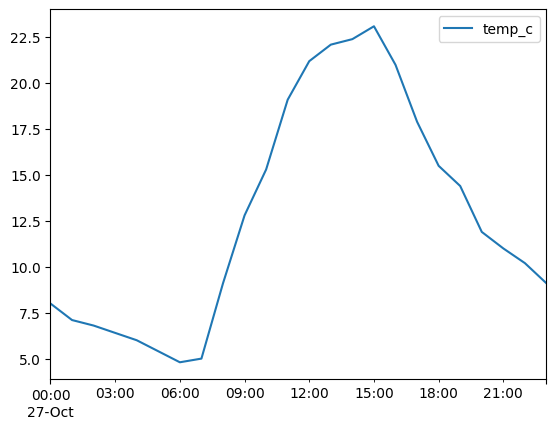

In [168]:
temp.plot().get_figure().savefig('temperatures.png')

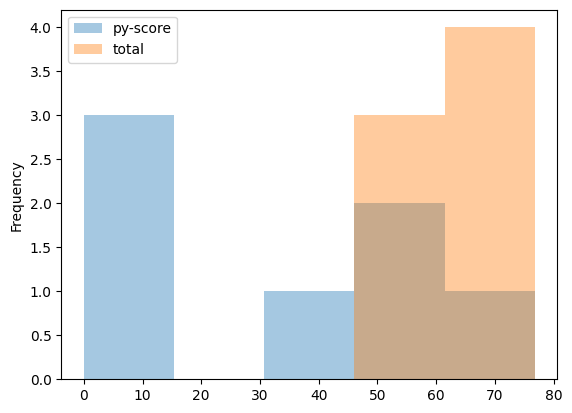

In [170]:
df.loc[:, ['py-score', 'total']].plot.hist(bins=5, alpha=0.4)

plt.show()